In [10]:
import xcast as xc 
import xarray as xr 
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import utils_b as utils
import numpy as np

In [2]:
from functools import partial
def _preprocess(x, lon_bnds, lat_bnds):
    return x.sel(longitude=slice(*lon_bnds), latitude=slice(*lat_bnds))

lon_bnds, lat_bnds = (-180, 180), (-20, 20) #Fiji Island
partial_func = partial(_preprocess, lon_bnds=lon_bnds, lat_bnds=lat_bnds)
ds = xr.open_mfdataset("/Users/bohar/Documents/Pacific_Islands/data/CHIRPS/chirps-v2.0.*.days_p05.nc", preprocess=partial_func)

# Pacific Island in the tropical central pacific so shifting data such that Pacific Island  will be in the center
ds = ds.assign_coords(longitude=(((ds.longitude + 360) % 360)))

# Then, sort the dataset by the new longitude values
ds = ds.sortby('longitude')

In [3]:
# Define latitude and longitude ranges (Fiji)
lat_range = slice(-20, -15)  # from -19°S to -16°S
lon_range = slice(176, 183)  # from 176°E to 180°E

# Define latitude and longitude ranges (Solomon Island)
lat_ranges = slice(-12, -6.5)  
lon_ranges = slice(155.5, 168)  

# Define latitude and longitude ranges (Kiribati)
lat_rangek = slice(1.4, 2.4)  
lon_rangek = slice(202, 203) 

In [4]:
# Slice the dataset to extract data for Fiji
ds_fiji = ds.sel(latitude=lat_range, longitude=lon_range)
#ds_soloman = ds.sel(latitude=lat_ranges, longitude=lon_ranges)
#ds_kiribati = ds.sel(latitude=lat_rangek, longitude=lon_rangek)
del ds
ds =ds_fiji
del ds_fiji

In [5]:
# Group the data by month and calculate the mean along the time dimension
P_clim = ds.groupby('time.month').mean(dim='time')
P_clim

<xarray.Dataset>
Dimensions:    (latitude: 66, month: 12, longitude: 120)
Coordinates:
  * latitude   (latitude) float32 -19.27 -19.23 -19.18 ... -16.12 -16.08 -16.03
  * longitude  (longitude) float32 176.0 176.1 176.1 176.2 ... 181.9 181.9 182.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip     (month, latitude, longitude) float32 dask.array<chunksize=(1, 58, 80), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

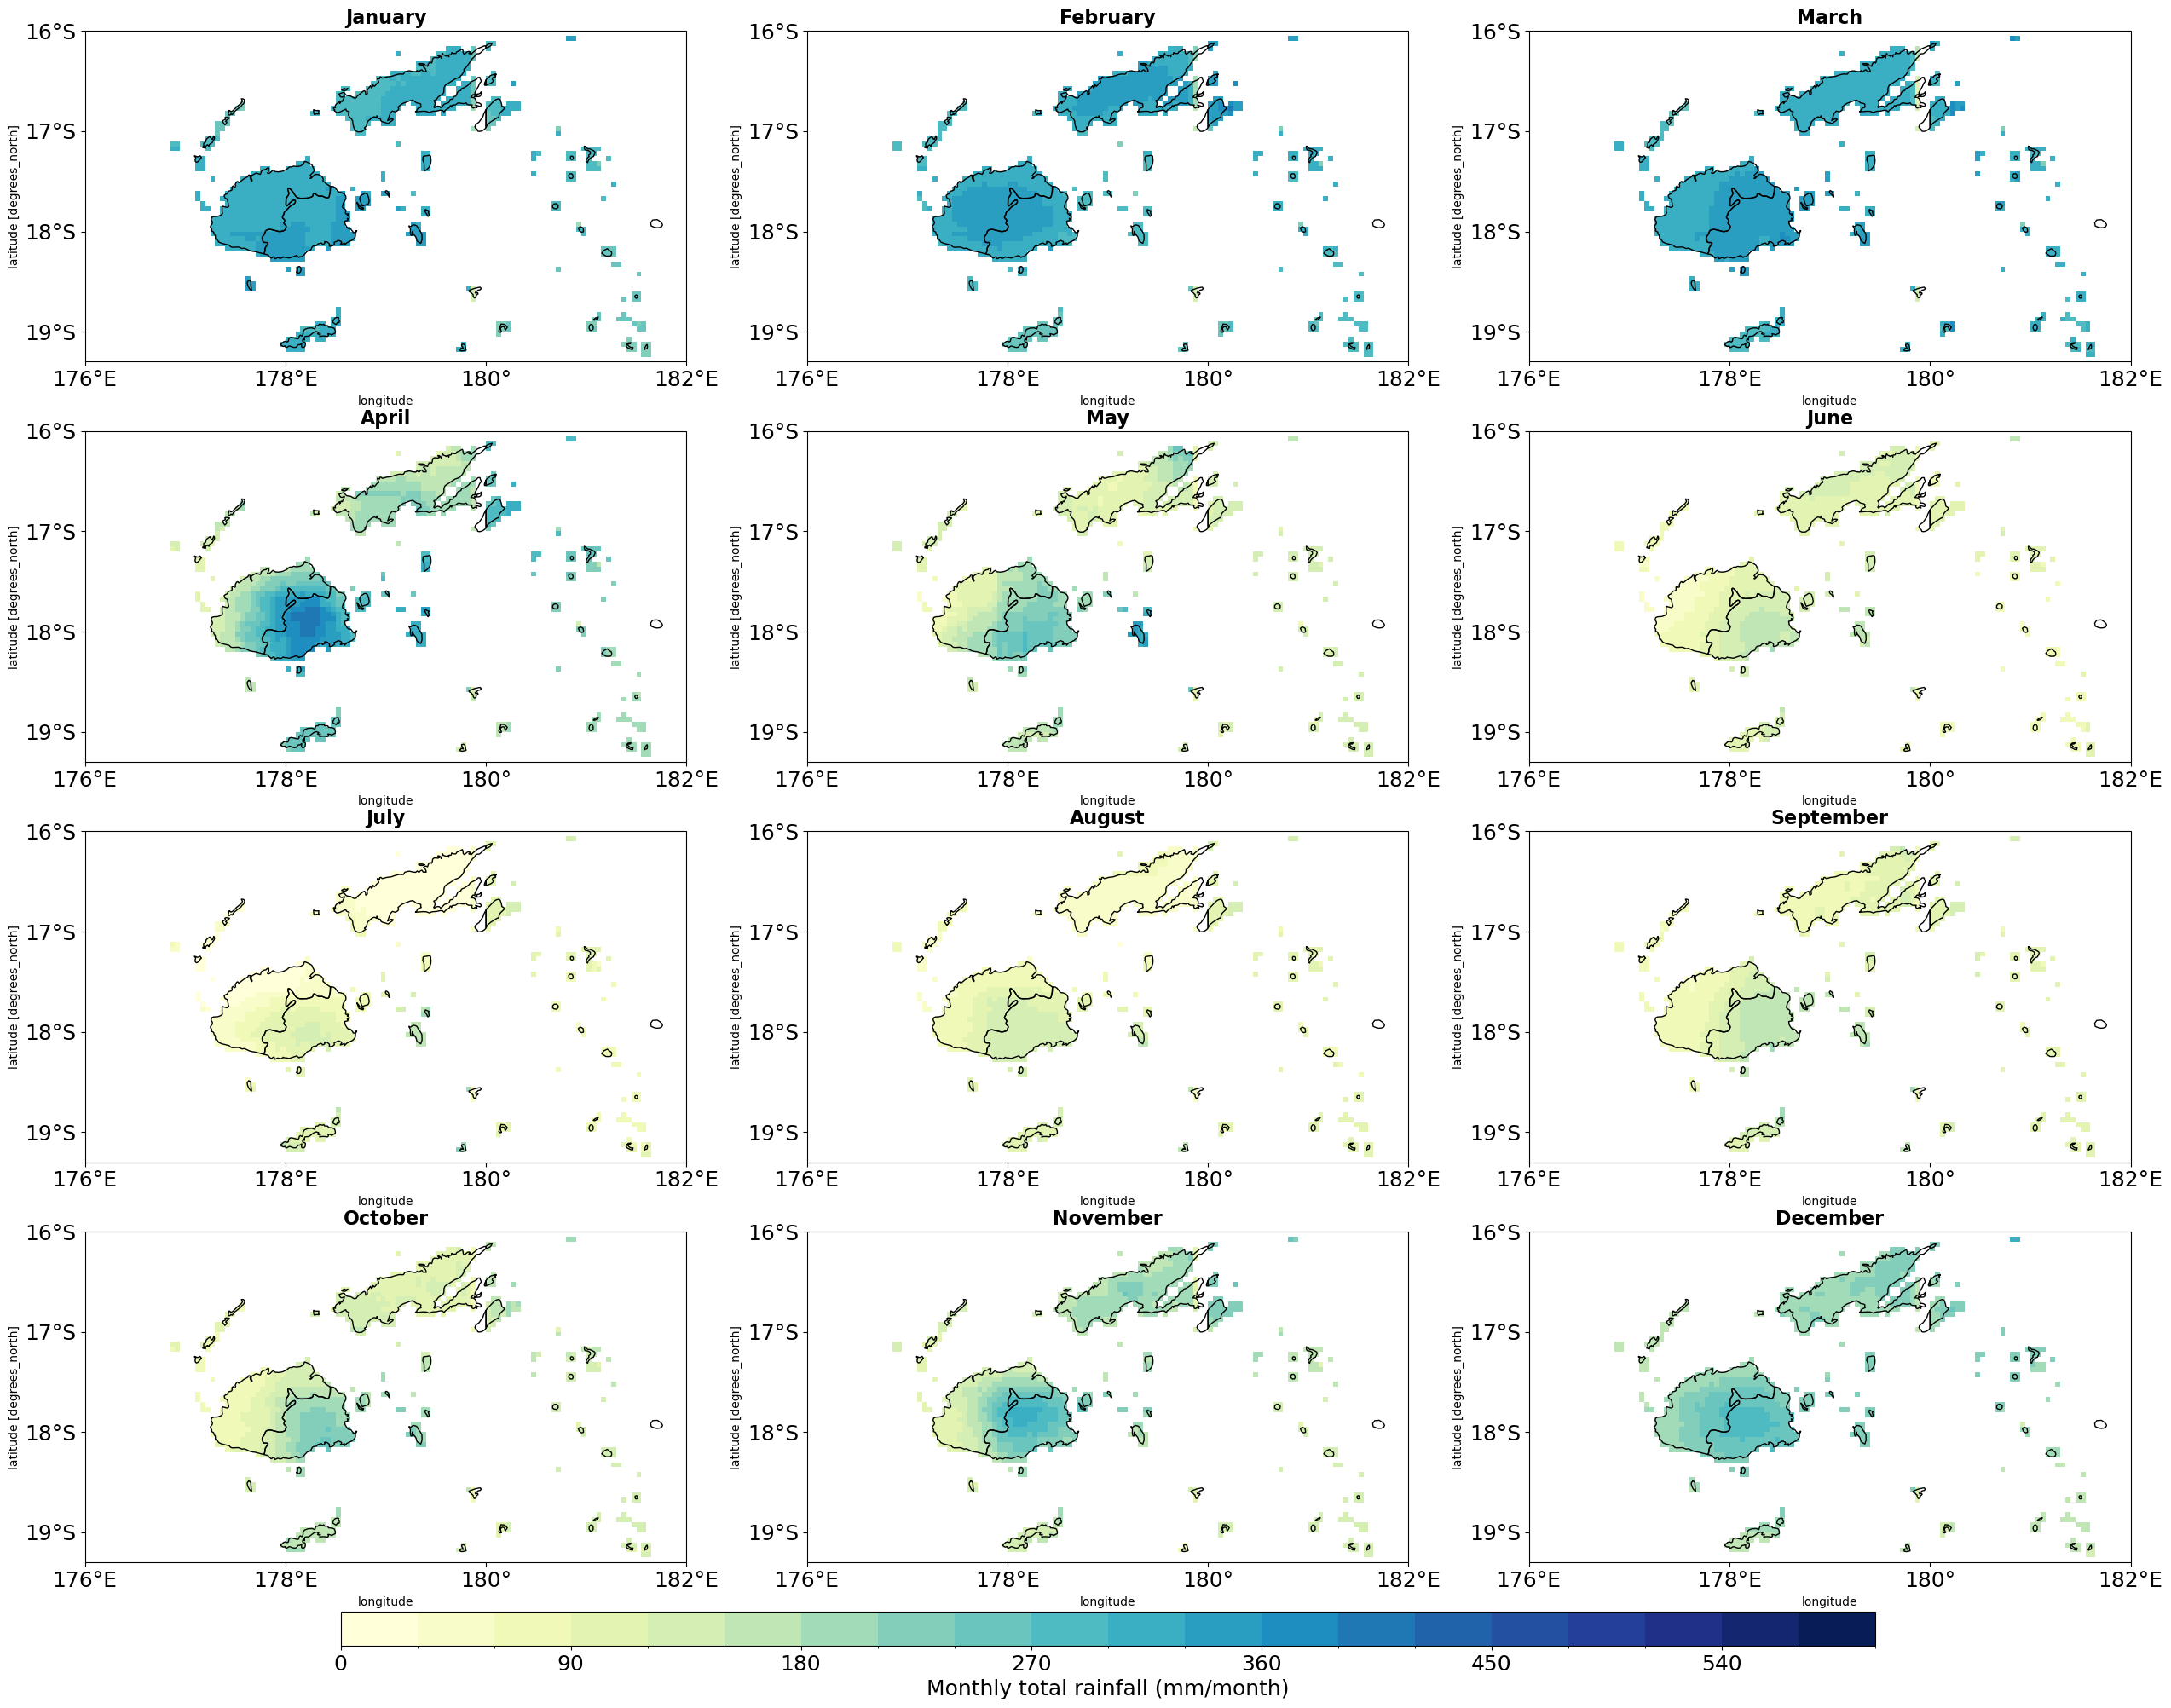

In [44]:
import calendar
# Create a figure
fig = plt.figure(figsize=(30, 20))

# Iterate over each month and plot the data
for i, month in enumerate(range(1, 13)):
    #print(month)
    # Add subplot to the figure
    ax = fig.add_subplot(4, 3, i+1, projection=ccrs.PlateCarree(central_longitude=180))
    P =30*P_clim.sel(month=month).precip
    # Plot data for the current month
    im =P.plot(ax=ax,transform=ccrs.PlateCarree(), vmin=0, vmax=600, levels=21, cmap='YlGnBu',add_colorbar=False)
    del P
    # Set title with month name
    ax.set_title(calendar.month_name[month], fontsize=16, weight='bold')
    
    # Add features
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.STATES)
    # Set the ticks manually
    xticks = [176, 178, 180, 182]
    yticks = [-19,  -18,  -17, -16]
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    # Set the tick labels
    ax.set_xticklabels(['176°E', '178°E', '180°', '182°E'])
    ax.set_yticklabels(['19°S', '18°S', '17°S', '16°S'])
    # Set font size for tick labels
    plt.setp(ax.get_xticklabels(), fontsize=18)
    plt.setp(ax.get_yticklabels(), fontsize=18)
# Adjust layout
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)
# Add a single horizontal colorbar below the panel plot
cbar_ax = fig.add_axes([0.15, 0.002, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Monthly total rainfall (mm/month)', fontsize=18)
cbar.ax.tick_params(labelsize=18)

# Show plot
plt.show()

In [12]:
# Calculate mean over latitudes and longitudes
mean_climatology = P_clim.mean(dim=['latitude', 'longitude'])
del P_clim

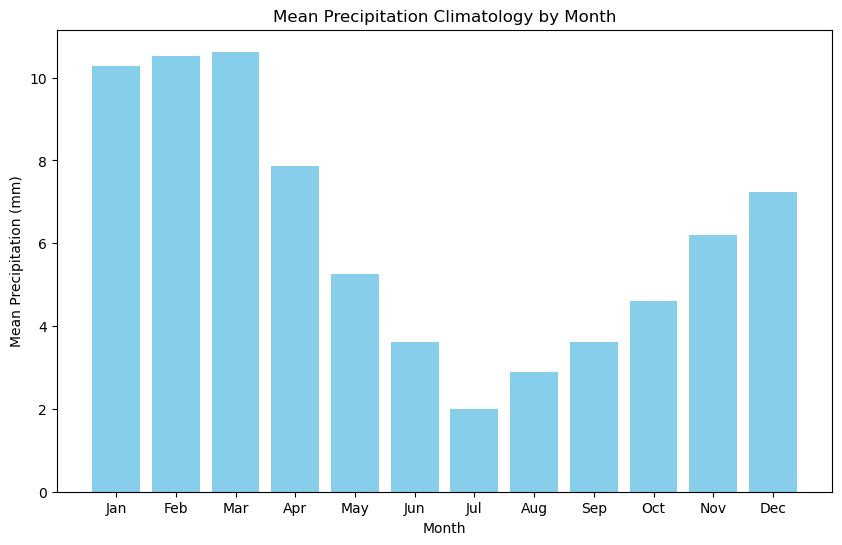

In [13]:
import matplotlib.pyplot as plt

# Extracting the precipitation data
precip_data = mean_climatology['precip']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(precip_data['month'], precip_data, color='skyblue')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Mean Precipitation (mm)')
plt.title('Mean Precipitation Climatology by Month')

# Customize x-axis ticks to show month names
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show plot
plt.show()


In [48]:
# Extract the precipitation data
precip = ds['precip']

# Compute the mean precipitation for each day of the year
daily_mean = precip.mean(dim='time')

# Subtract the daily mean from the precipitation data to get anomalies
anomalies = precip - daily_mean
#anomalies
del ds


NameError: name 'ds' is not defined

In [49]:
import xarray as xr
import pandas as pd
import numpy as np
mjo_ind = xr.open_dataset('/Users/bohar/Documents/Pacific_Islands/data/indices/MJO_index_1974_11May2024.nc', decode_times=True)
mjo_ind

<xarray.Dataset>
Dimensions:    (T: 18243)
Coordinates:
  * T          (T) float32 2.442e+06 2.442e+06 2.442e+06 ... 2.46e+06 2.46e+06
Data variables:
    amplitude  (T) float32 ...
    phase      (T) float32 ...
    RMM1       (T) float32 ...
    RMM2       (T) float32 ...
Attributes:
    references:   Wheeler_Hendon2004
    expires:      1715558400
    description:  Real-time Multivariate MJO Index (with components of intera...

In [50]:
# Create a range of dates in the Gregorian calendar starting from January 1, 1981
standard_dates = xr.cftime_range(start='1974-06-01', periods=len(mjo_ind.T), calendar='gregorian')

# Convert the cftime objects to datetime64[ns] format
standard_dates = np.array([pd.Timestamp(date.year, date.month, date.day) for date in standard_dates])

# Update the "T" dimension with the standard dates
mjo_ind = mjo_ind.assign_coords(T=standard_dates)

# Print the updated dataset
mjo_ind 

<xarray.Dataset>
Dimensions:    (T: 18243)
Coordinates:
  * T          (T) datetime64[ns] 1974-06-01 1974-06-02 ... 2024-05-11
Data variables:
    amplitude  (T) float32 ...
    phase      (T) float32 ...
    RMM1       (T) float32 ...
    RMM2       (T) float32 ...
Attributes:
    references:   Wheeler_Hendon2004
    expires:      1715558400
    description:  Real-time Multivariate MJO Index (with components of intera...

In [51]:
# Subset the dataset to the desired time range
subset_ds = mjo_ind.sel(T=slice('1981-01-01', '2023-12-31'))
subset_ds
# Filter the data to include only those time steps where amplitude is greater than 1
filtered_ds = subset_ds.where((subset_ds.amplitude > 1) & (subset_ds.phase ==2), drop=True)
# Print the filtered dataset
subset_ds
#filtered_ds

<xarray.Dataset>
Dimensions:    (T: 15705)
Coordinates:
  * T          (T) datetime64[ns] 1981-01-01 1981-01-02 ... 2023-12-31
Data variables:
    amplitude  (T) float32 0.8131 0.8536 0.4724 0.2447 ... 1.993 2.047 1.894
    phase      (T) float32 2.0 2.0 3.0 5.0 5.0 5.0 ... 1.0 1.0 1.0 1.0 2.0 2.0
    RMM1       (T) float32 ...
    RMM2       (T) float32 ...
Attributes:
    references:   Wheeler_Hendon2004
    expires:      1715558400
    description:  Real-time Multivariate MJO Index (with components of intera...

1
5
2
6
3
7
4
8


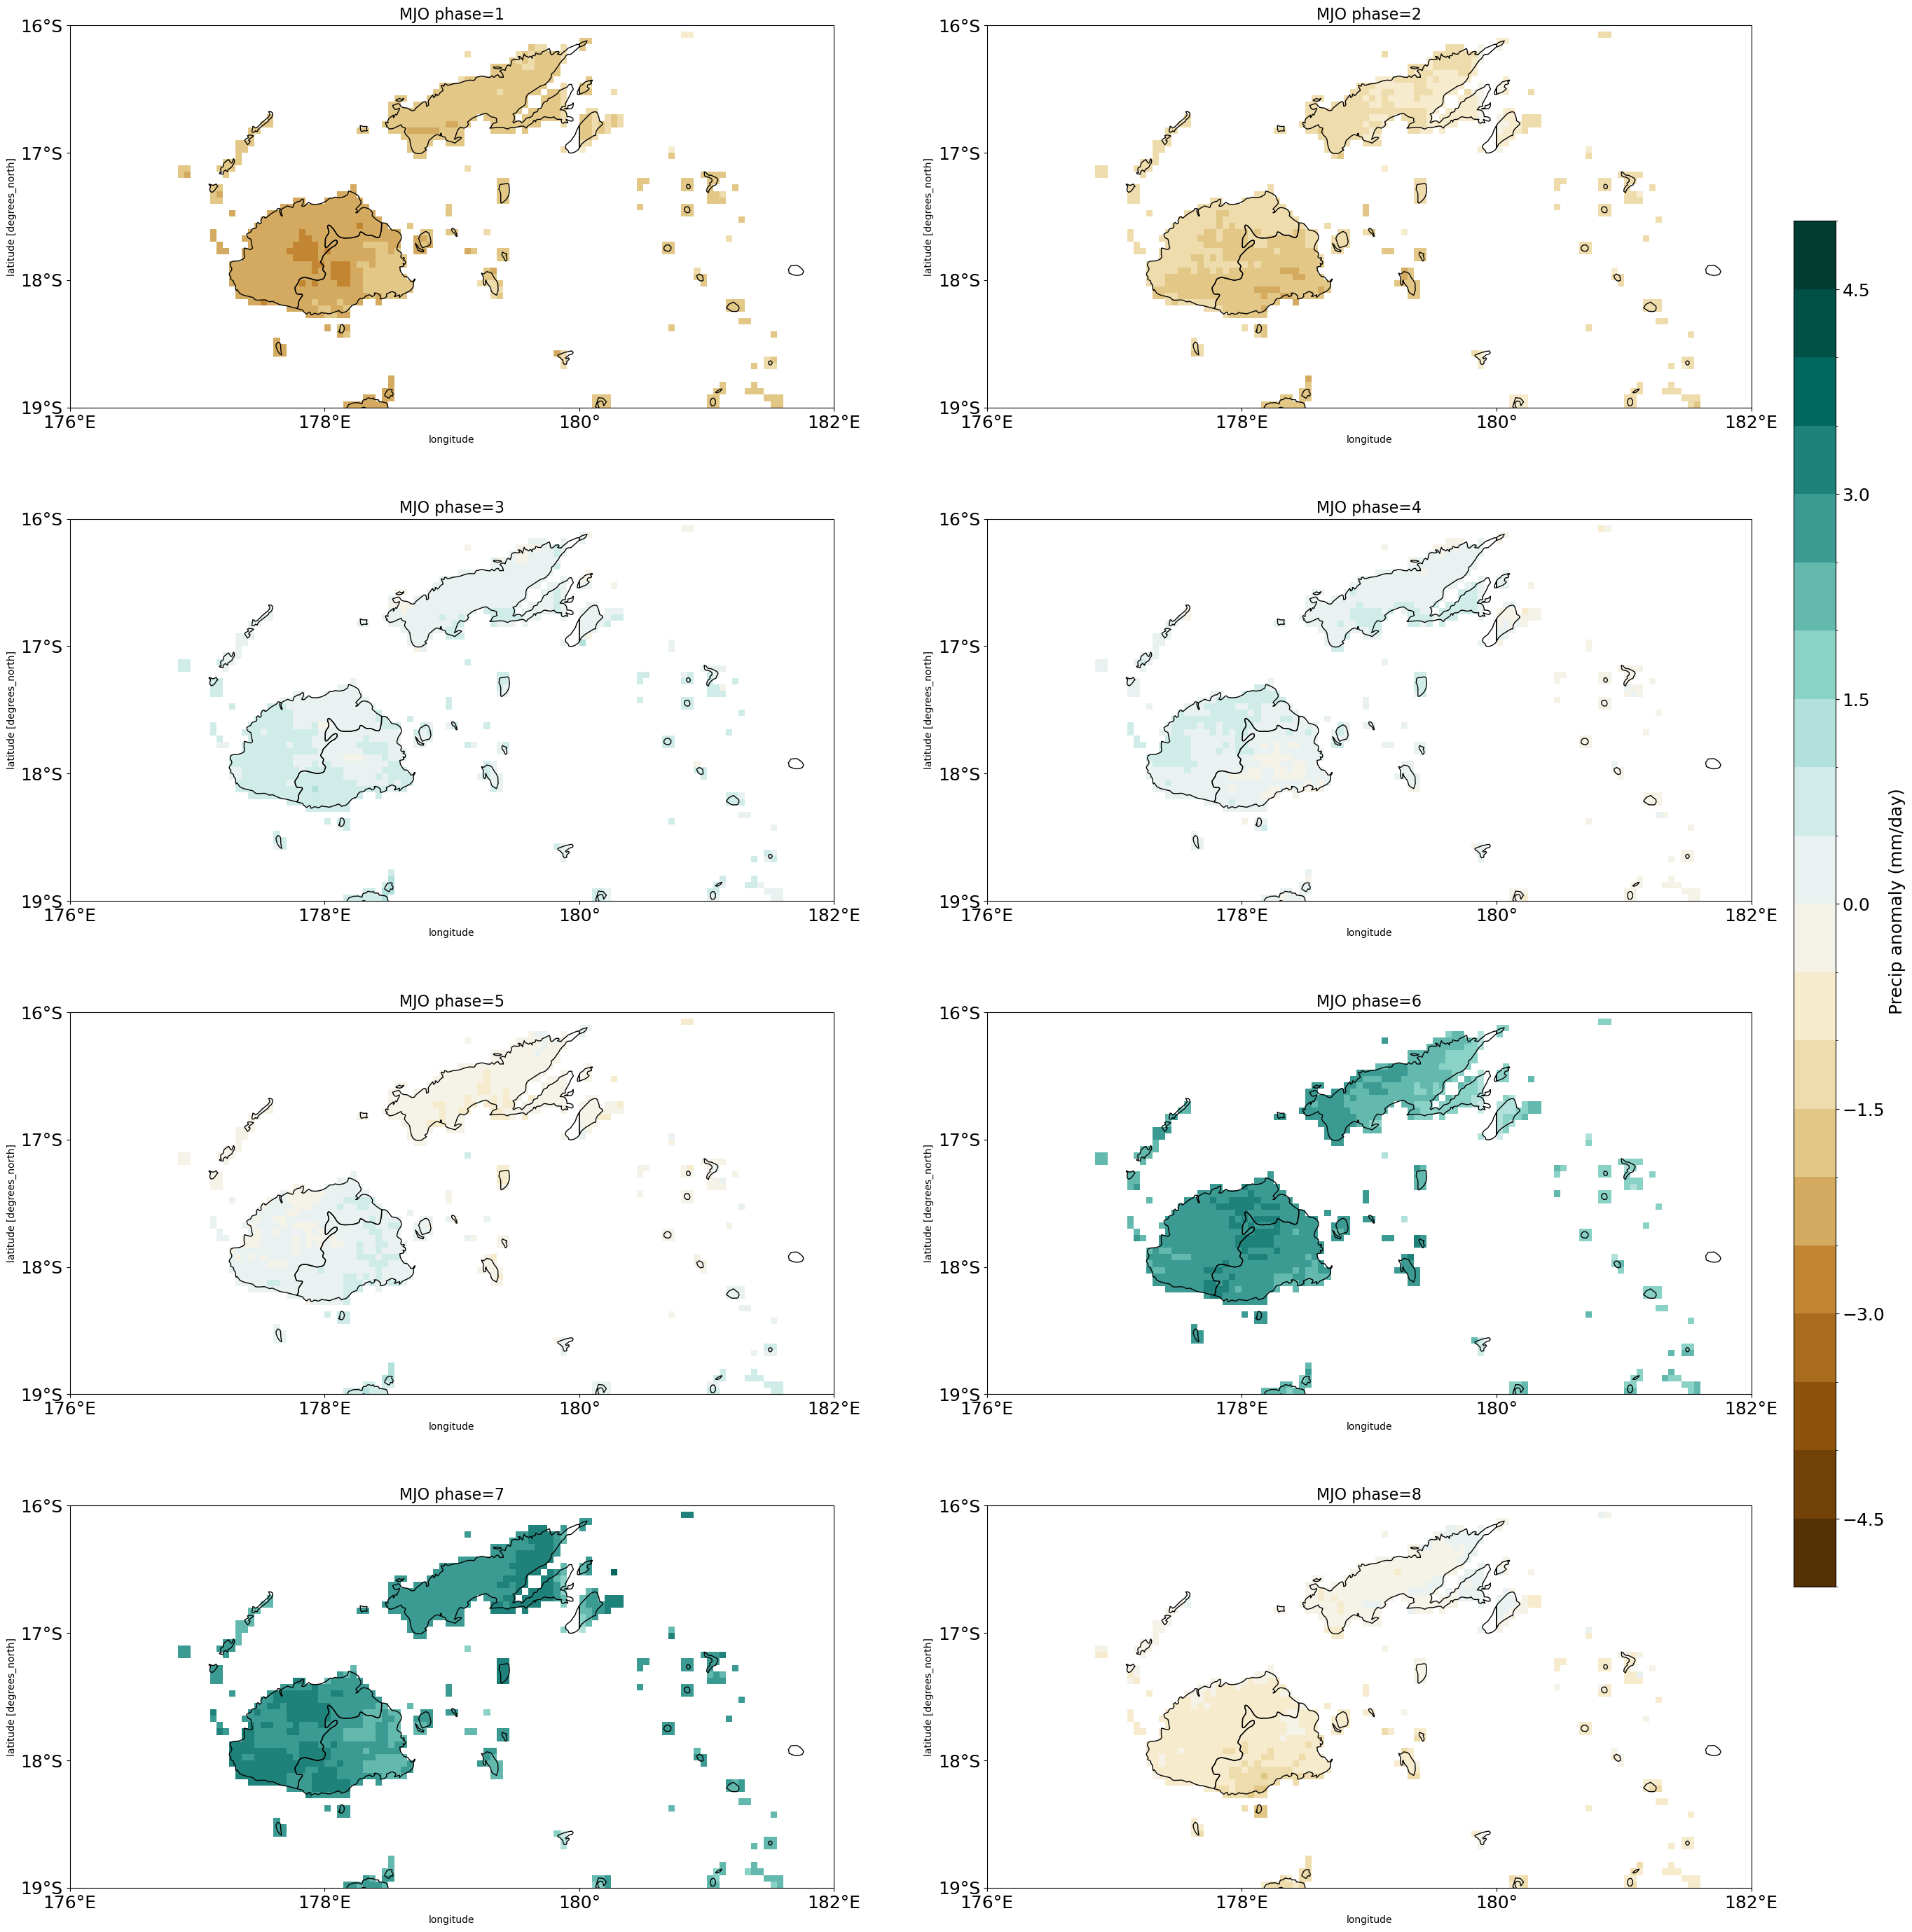

In [59]:
import calendar
# Create a figure
fig = plt.figure(figsize=(30,30))
numbers = [1, 5, 2, 6, 3,7,4, 8]
# Iterate over each month and plot the data
for num in numbers:
    print(num)
    filtered_ds = subset_ds.where((subset_ds.amplitude > 1) & (subset_ds.phase ==num), drop=True)
    time_f=filtered_ds['T']
    anom_phase=anomalies.sel(time=time_f)
    phase_comp =anom_phase.mean(dim ='T')
    del anom_phase, filtered_ds
    # Add subplot to the figure
    ax = fig.add_subplot(4, 2, num, projection=ccrs.PlateCarree(central_longitude=180))
    # Set the extent to 176E to 182E and -90 to 90 latitude
    ax.set_extent([176, 182, -19, -16], crs=ccrs.PlateCarree())
    # Plot data for the current month
    im =phase_comp.plot(
        ax=ax,transform=ccrs.PlateCarree(), vmin=-5, vmax=5, levels=21, cmap='BrBG' ,add_colorbar=False)

    # Set title with month name
    ax.set_title('MJO phase=' + str(num), fontsize=16)

    # Add features
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.STATES)

    # Set the ticks manually
    xticks = [176, 178, 180, 182]
    yticks = [-19,  -18,  -17, -16]
    ax.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax.set_yticks(yticks, crs=ccrs.PlateCarree())
    
    # Set the tick labels
    ax.set_xticklabels(['176°E', '178°E', '180°', '182°E'])
    ax.set_yticklabels(['19°S', '18°S', '17°S', '16°S'])
    # Set font size for tick labels
    plt.setp(ax.get_xticklabels(), fontsize=18)
    plt.setp(ax.get_yticklabels(), fontsize=18)
    # Set font size for tick labels
    ax.tick_params(axis='both', labelsize=18)
# Adjust layout
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05, wspace=0.2, hspace=0.2)

# Add a single colorbar for all subplots
cbar_ax = fig.add_axes([0.87, 0.2, 0.02, 0.65])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='vertical')
cbar.set_label(' Precip anomaly (mm/day)', fontsize=18)
cbar.ax.tick_params(labelsize=18)

# Show plot
plt.show()

In [21]:
from scipy.stats import ttest_1samp

In [22]:
def calculate_significance(anom_phase, confidence_level=0.95):
    """
    Calculate the 95% significance from a two-tailed t-test for each latitude and longitude value.
    
    Parameters:
    - anom_phase: xarray.DataArray with dimensions (time, latitude, longitude)
    - confidence_level: float, the confidence level for the t-test (default is 0.95)
    
    Returns:
    - significance_da: xarray.DataArray with boolean values indicating significance
    """
    # Perform the t-test against a population mean of 0
    t_values, p_values = ttest_1samp(anom_phase, 0, axis=0, nan_policy='omit')
    
    # Determine significance based on the confidence level
    alpha = 1 - confidence_level
    significance = p_values < alpha
    
    # Create a DataArray to store the significance results
    significance_da = xr.DataArray(
        significance,
        dims=["latitude", "longitude"],
        coords={
            "latitude": anom_phase.latitude,
            "longitude": anom_phase.longitude
        },
        name="significance"
    )
    
    return significance_da

In [29]:
filtered_ds = subset_ds.where((subset_ds.amplitude > 1) & (subset_ds.phase ==7), drop=True)
time_f=filtered_ds['T']

In [32]:
# Assuming `anomalies` is your dataset and `time_f` is the time period of interest
anom_phase = anomalies.sel(time=time_f)
phase_comp =anom_phase.mean(dim ='T')
# Call the function to get the significance DataArray
significance_da = calculate_significance(anom_phase)

# Print the significance DataArray
print(significance_da)

<xarray.DataArray 'significance' (latitude: 66, longitude: 120)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * latitude   (latitude) float32 -19.27 -19.23 -19.18 ... -16.12 -16.08 -16.03
  * longitude  (longitude) float32 176.0 176.1 176.1 176.2 ... 181.9 181.9 182.0


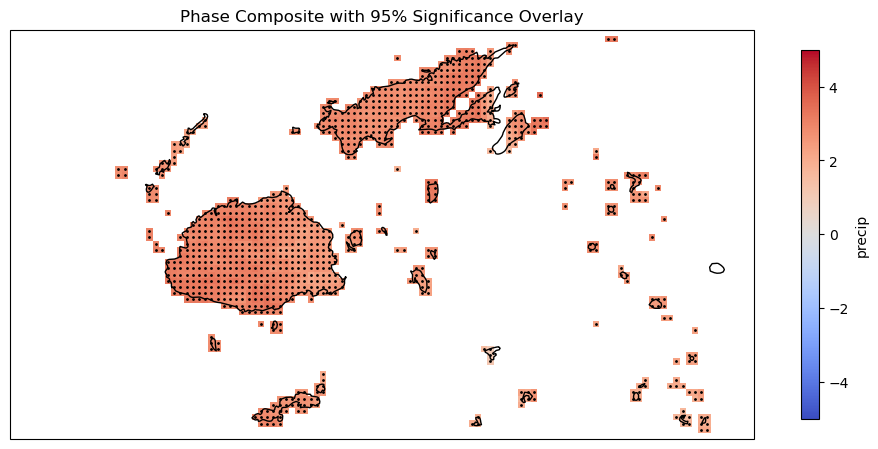

In [37]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

phase_comp.plot(
    ax=ax, transform=ccrs.PlateCarree(),vmin=-5, vmax=5, cmap='coolwarm', 
    cbar_kwargs={'shrink': 0.8, 'orientation': 'vertical'}
)

# Overlay significance with black dots
# We use scatter to plot the significant points
lon, lat = np.meshgrid(anom_phase.longitude, anom_phase.latitude)
sig_lon = lon[significance_da.values]
sig_lat = lat[significance_da.values]

ax.scatter(sig_lon, sig_lat, color='black', transform=ccrs.PlateCarree(), s=1)

# Add coastlines for better geographic context
ax.coastlines()

# Set plot title and labels
ax.set_title('Phase Composite with 95% Significance Overlay')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

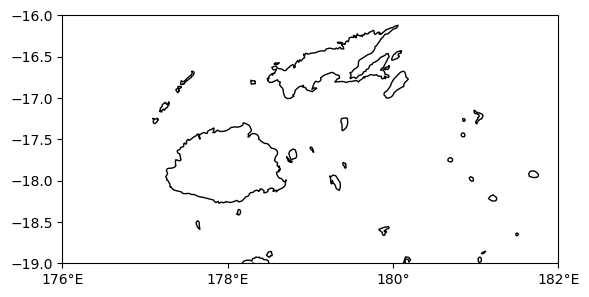

In [22]:
# Create a projection centered on 180 degrees longitude
projection = ccrs.PlateCarree(central_longitude=180)

# Create a figure and an axis with this projection
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Set the extent to 176E to 182E and -90 to 90 latitude
ax.set_extent([176, 182, -19, -16], crs=ccrs.PlateCarree())

# Set the ticks manually
xticks = [176, 178, 180, 182]
yticks = [-19, -18.5, -18, -17.5, -17, -16.5, -16]
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Set the tick labels
ax.set_xticklabels(['176°E', '178°E', '180°', '182°E'])
#ax.set_yticklabels(['90°S', '60°S', '30°S', '0°', '30°N', '60°N', '90°N'])

# Draw coastlines for reference
ax.coastlines()

plt.show()